In [123]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

import pathlib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import warnings
warnings.filterwarnings('ignore')

In [124]:
data = pd.read_csv("C:/Users/charl/Downloads/dataset.csv")

In [125]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [126]:
'''
age - 나이
sex - (1=남성, 0=여성)
cp - 가슴 통증 유형(0,1,2,3,4)
trestbps - 안정 혈압
chol - 혈청 코레스테롤
fbs - 공복 혈당(1=true, 2-false)
restecg - 안정 심전도 결과 (0,1,2)
thalach - 최대 심박동수
exang - 협심증 유발 운동(1=yesl 0=no)
oldpeak - 비교적 안정되기까지 운동으로 유발되는 ST depression
slope - 최대 운동 ST segment의 기울기
ca - 형광 투시된 주요 혈관의 수(0,1,2,3)
thal - (3=보통; 6=해결된 결함; 7=해결가능한 결함)
target - 심장병 진단 (1=ture; 0=false)
'''

'\nage - 나이\nsex - (1=남성, 0=여성)\ncp - 가슴 통증 유형(0,1,2,3,4)\ntrestbps - 안정 혈압\nchol - 혈청 코레스테롤\nfbs - 공복 혈당(1=true, 2-false)\nrestecg - 안정 심전도 결과 (0,1,2)\nthalach - 최대 심박동수\nexang - 협심증 유발 운동(1=yesl 0=no)\noldpeak - 비교적 안정되기까지 운동으로 유발되는 ST depression\nslope - 최대 운동 ST segment의 기울기\nca - 형광 투시된 주요 혈관의 수(0,1,2,3)\nthal - (3=보통; 6=해결된 결함; 7=해결가능한 결함)\ntarget - 심장병 진단 (1=ture; 0=false)\n'

In [127]:
data.shape

(303, 14)

In [128]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [130]:
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

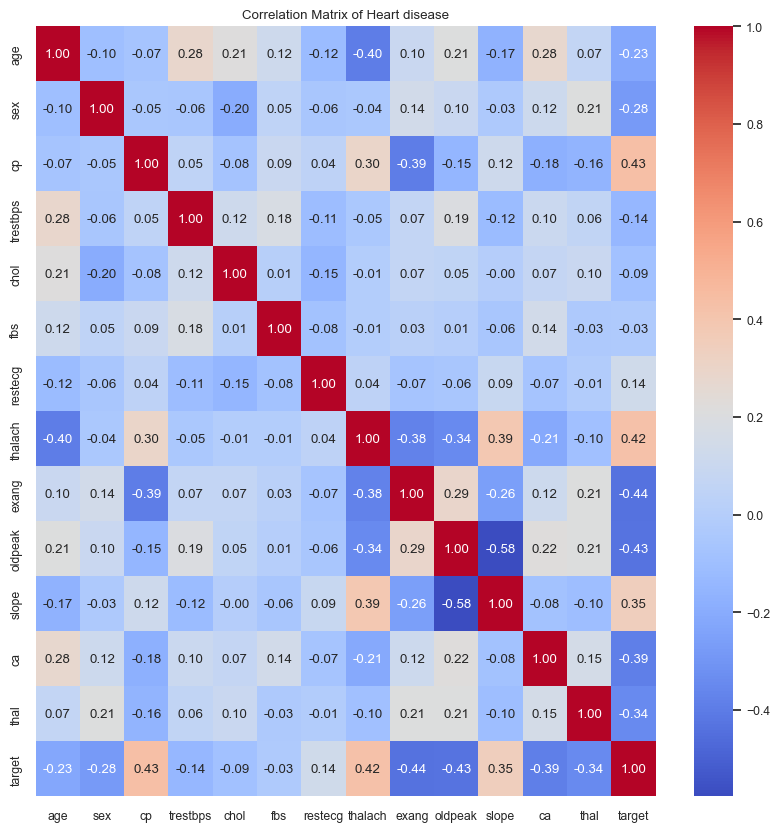

In [131]:
#상관 관계 행렬
data_corr=data.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(data_corr, annot=True, cmap='coolwarm', fmt='.2f')
#sns.heatmap(data_corr, annot=True, cbar=False)
plt.title('Correlation Matrix of Heart disease')
plt.show()

In [132]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [133]:
fig, axs = plt.subplots(figsize=(16,8), ncols=2, nrows=3)

lm_features = ['cp','exang', 'thalach', 'age','oldpeak','slope']

# i에는 인덱스가 feature에가 들어감
for i, feature in enumerate(lm_features):
    row = int(i/2) # 3행
    col = i%2

    # sns.regplot : 회귀직선을 그려줌
    sns.regplot(x=feature, y='trestbps', data=data, ax=axs[row][col])

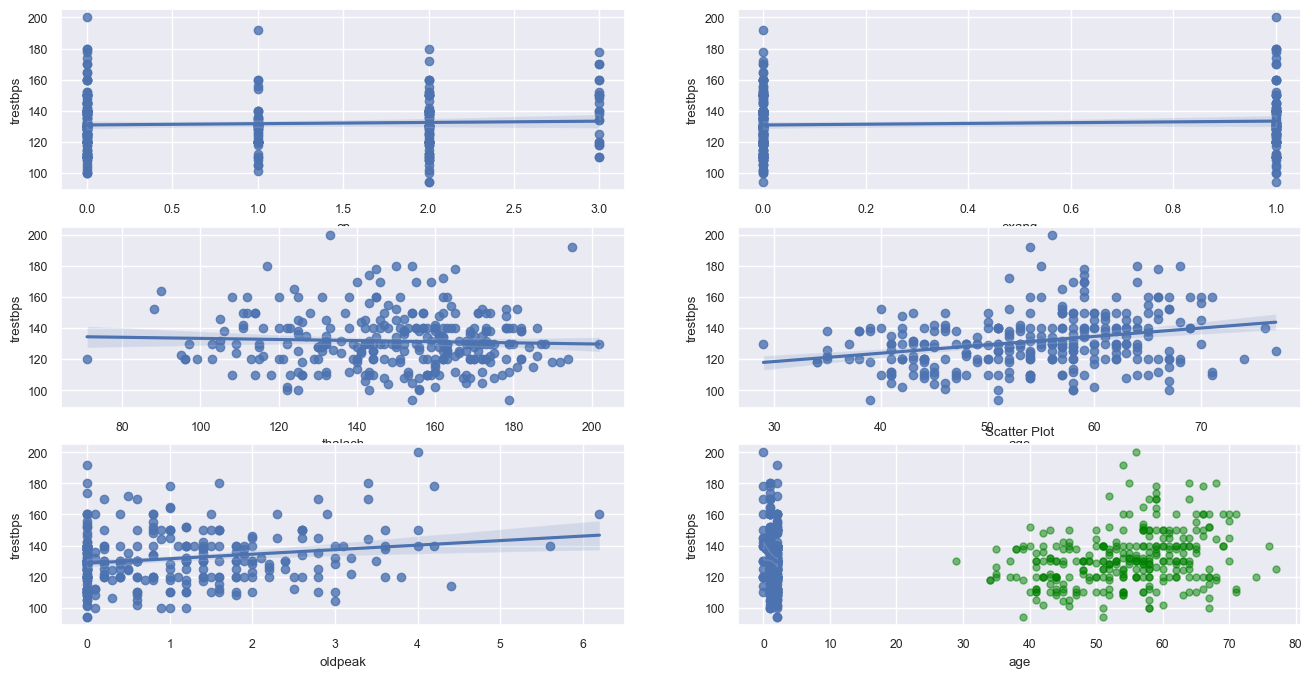

In [134]:
plt.plot('age', 'trestbps', 
         data=data,
         linestyle='none', 
         marker='o', 
         markersize=5,
         color='Green', 
         alpha=0.5)
plt.title('Scatter Plot')
plt.xlabel('age')
plt.ylabel('trestbps')
plt.show()

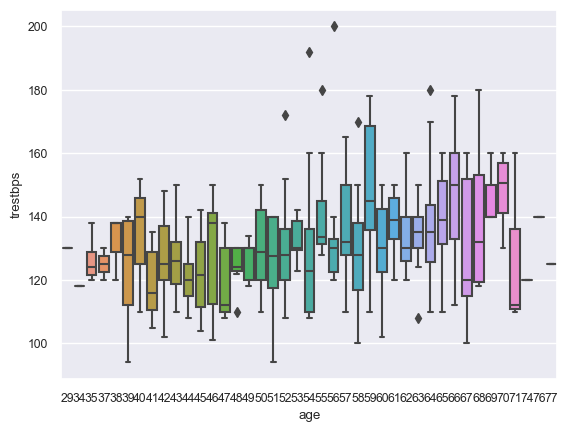

In [135]:
sns.boxplot(x='age', y='trestbps', data=data)
plt.show()


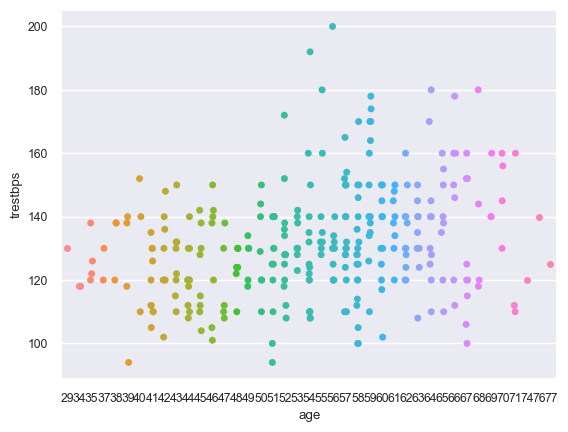

In [136]:
sns.stripplot(x='age', y='trestbps', data=data, jitter=True, edgecolor="gray", size=5)
plt.show()

In [137]:
!pip install sweetviz

                                             |          | [  0%]   00:00 -> (? left)


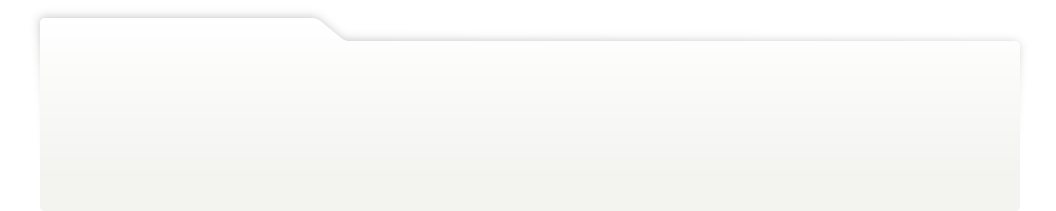
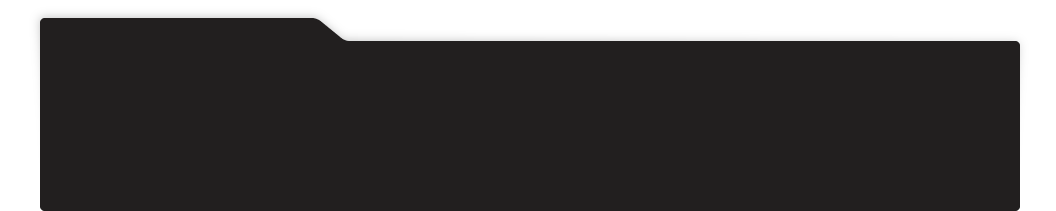
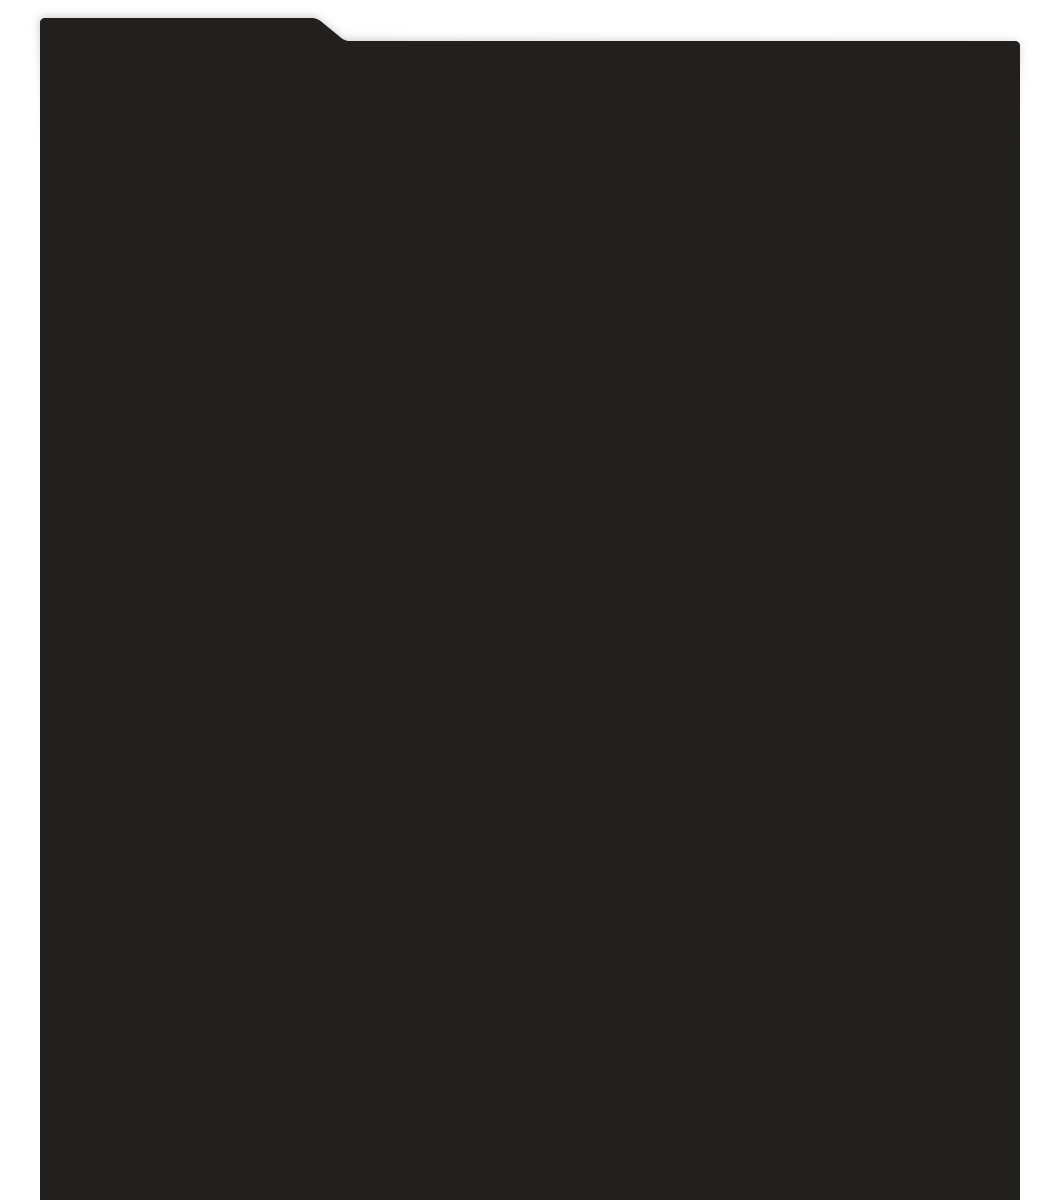
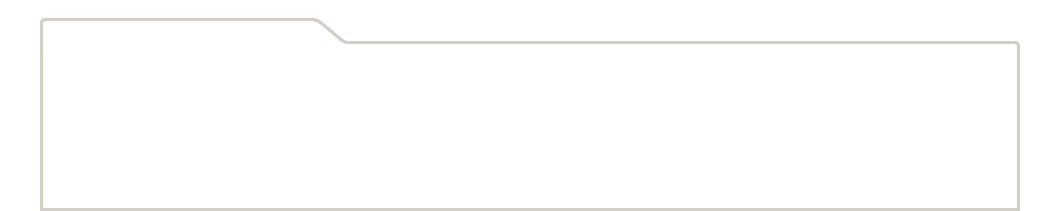
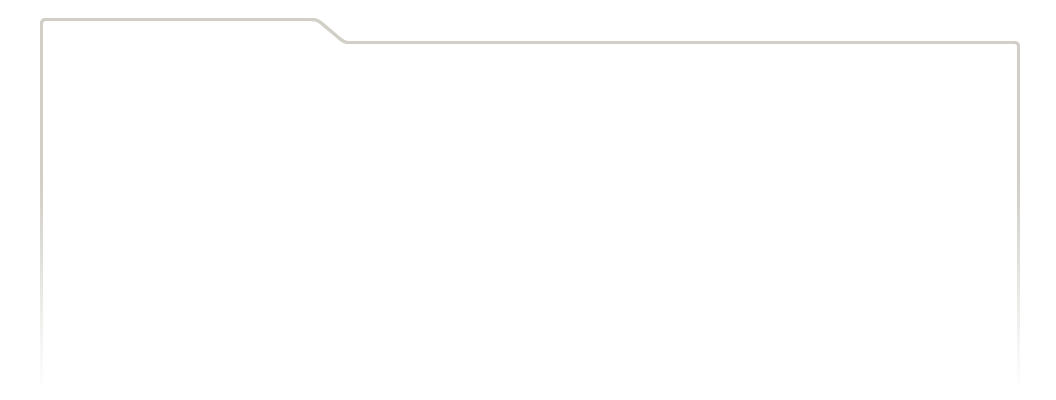
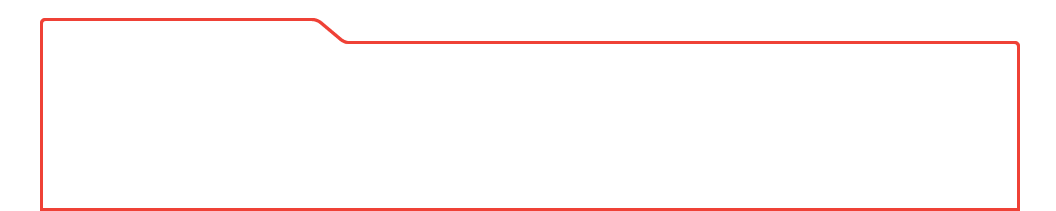
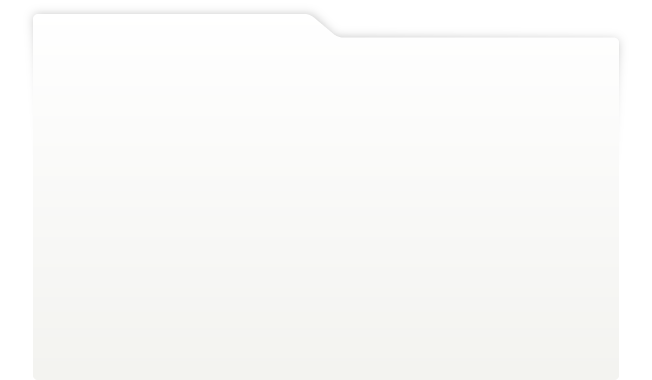
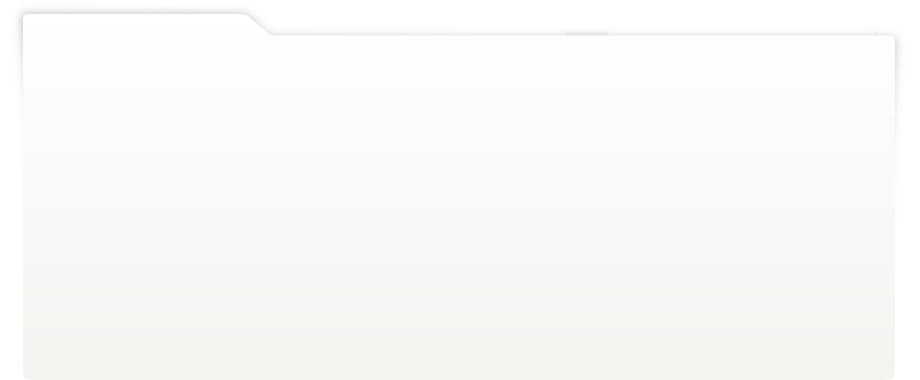
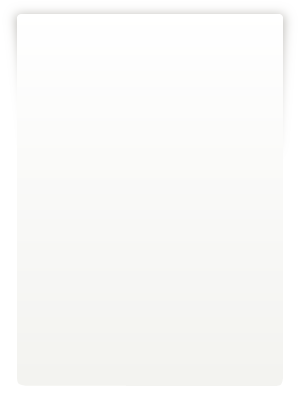
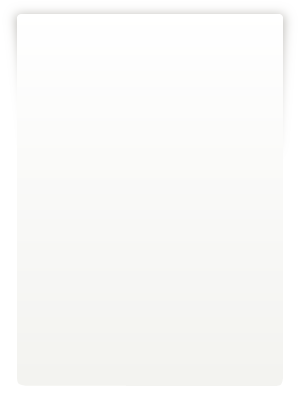
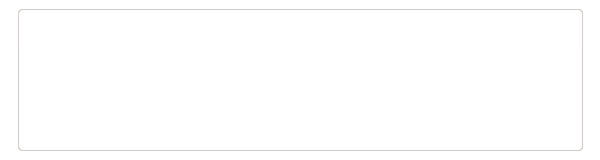
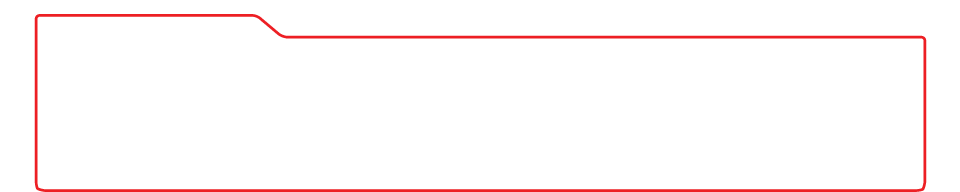
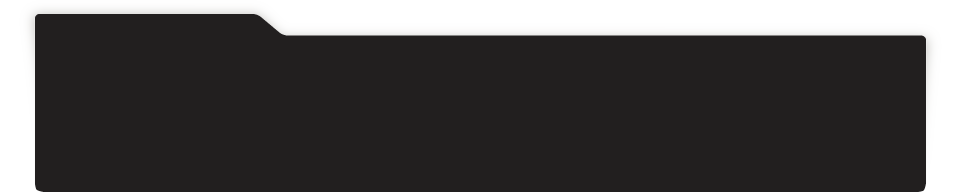
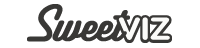
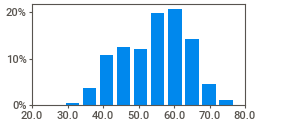
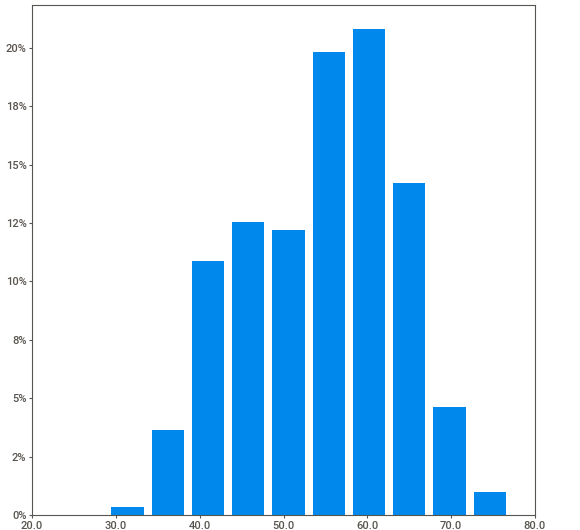
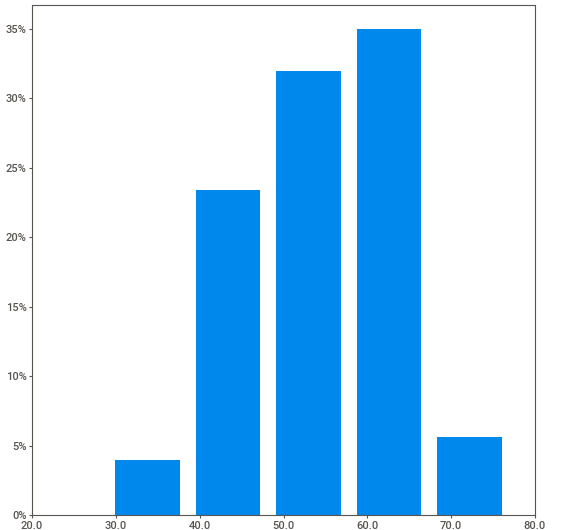
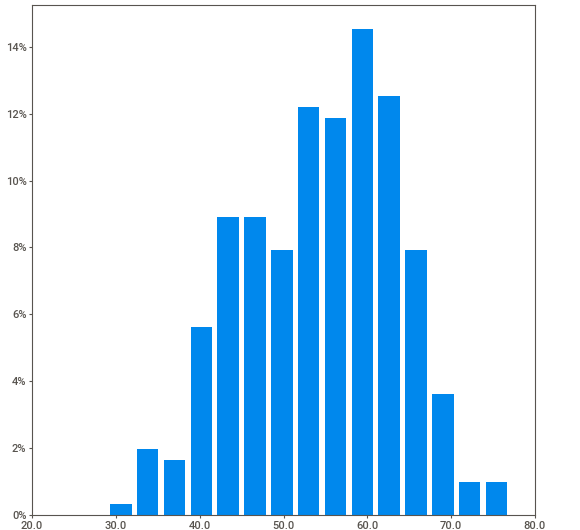
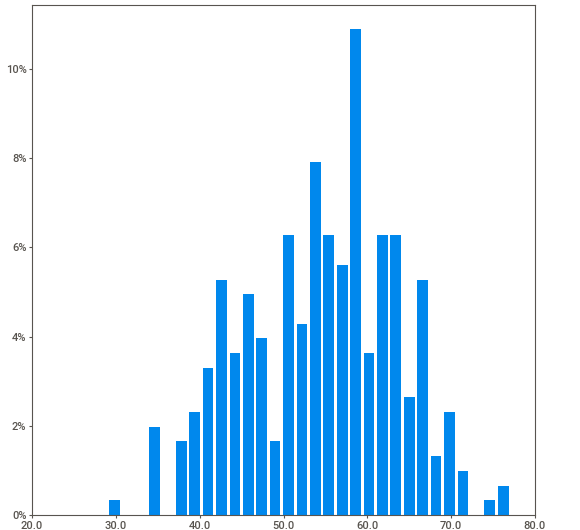
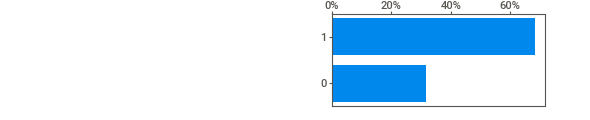
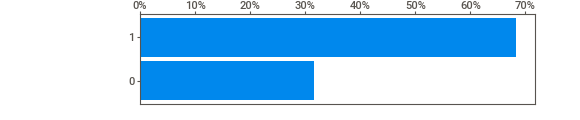
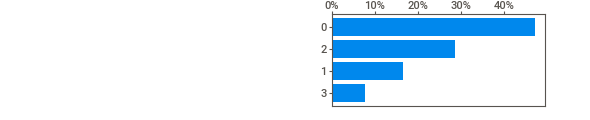
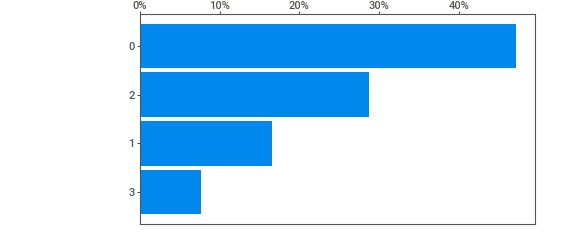
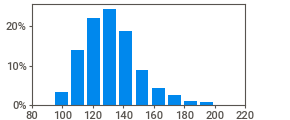
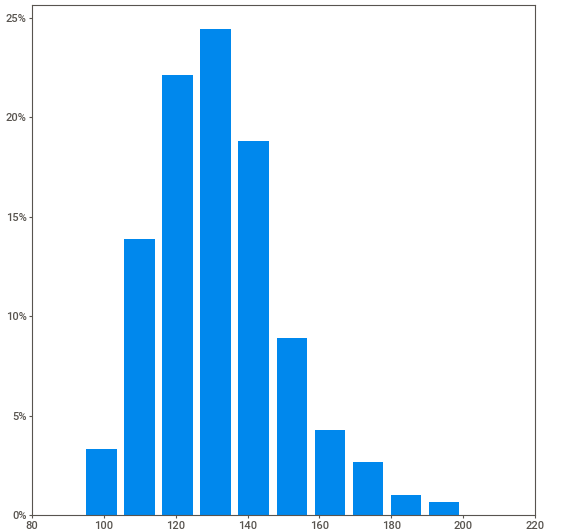
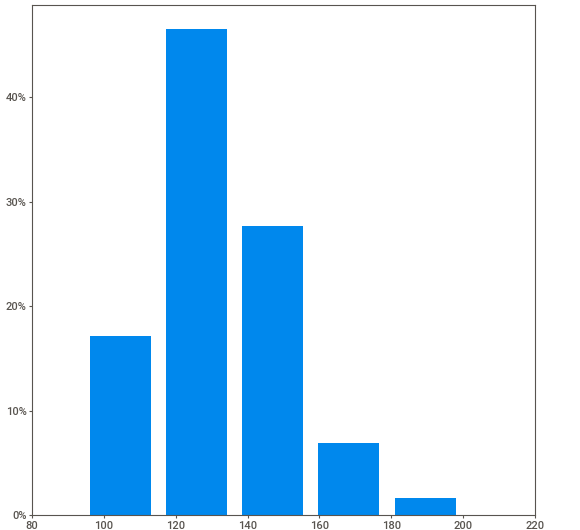
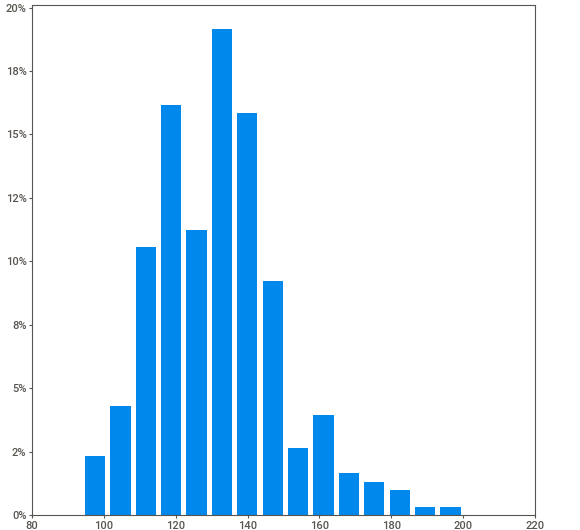
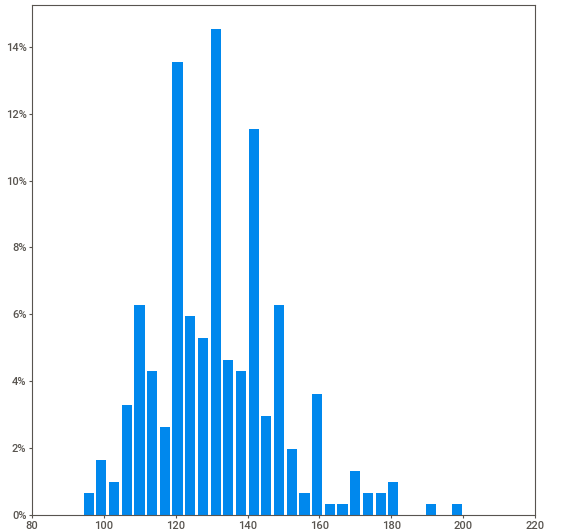
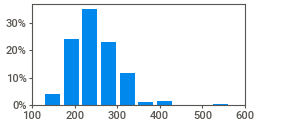
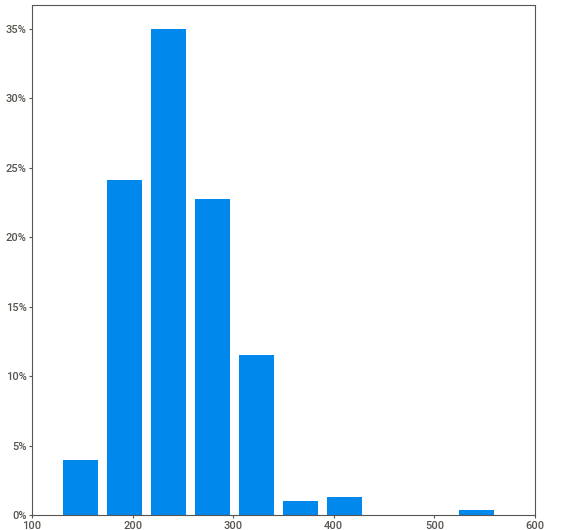
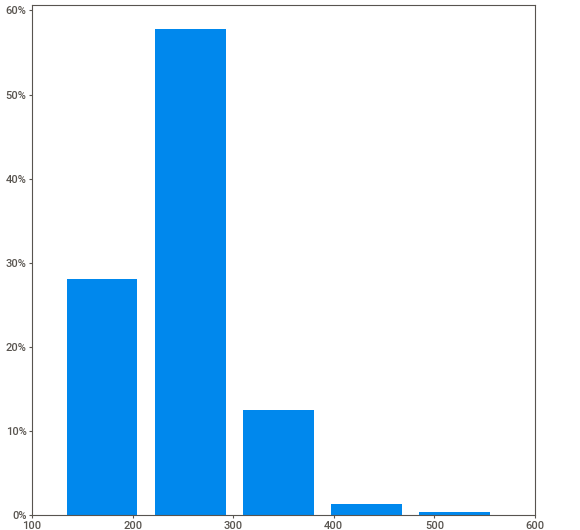
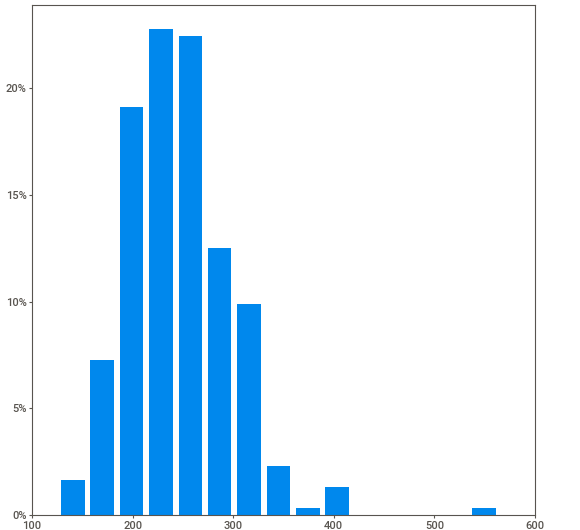
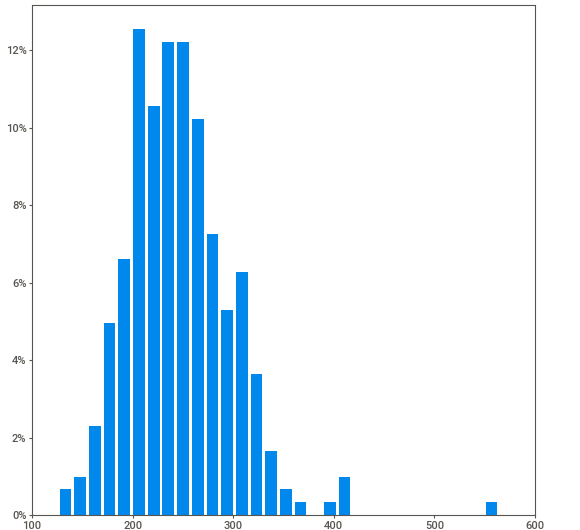
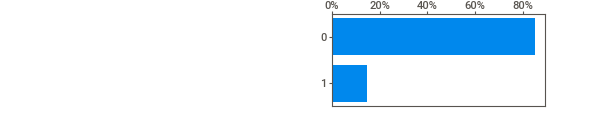
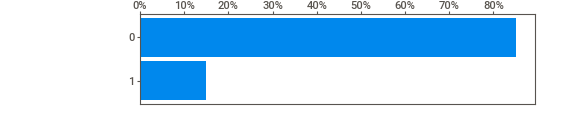
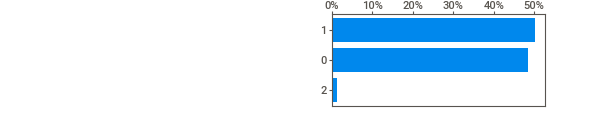
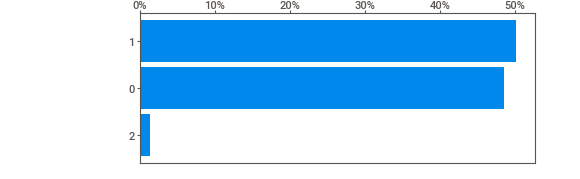
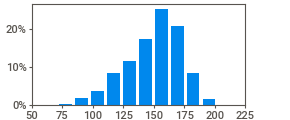
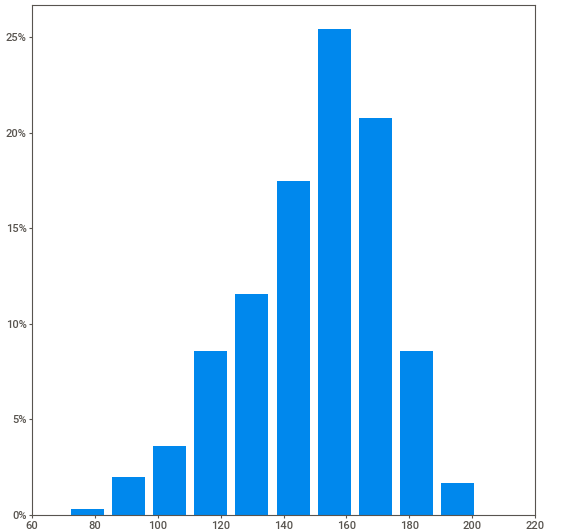
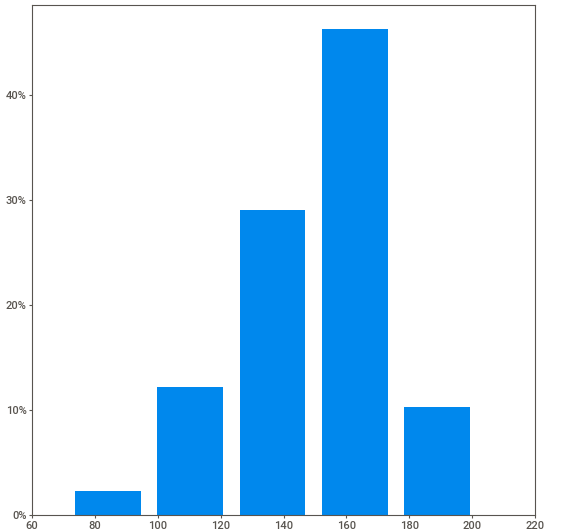
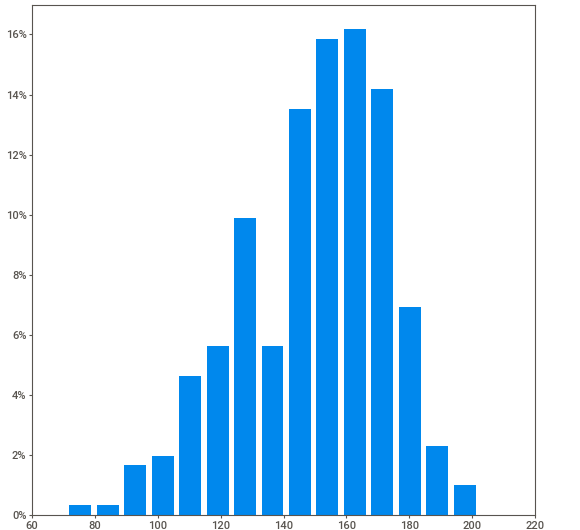
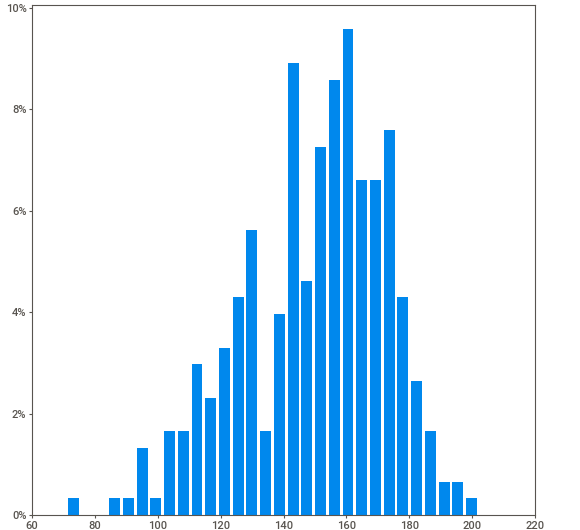
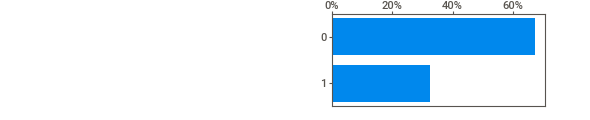
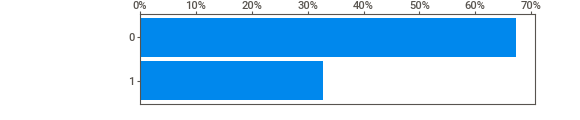
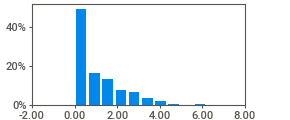
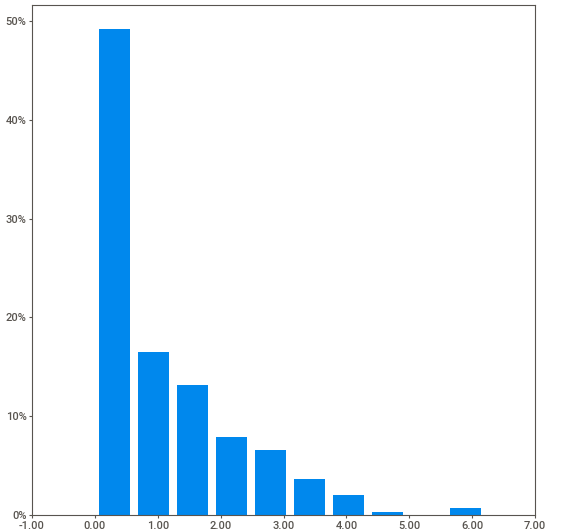
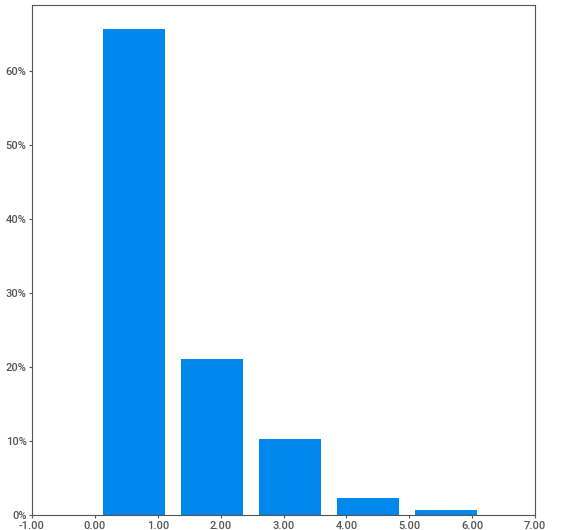
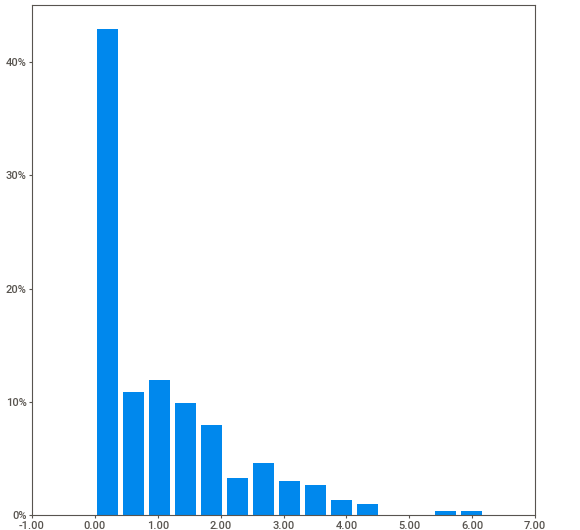
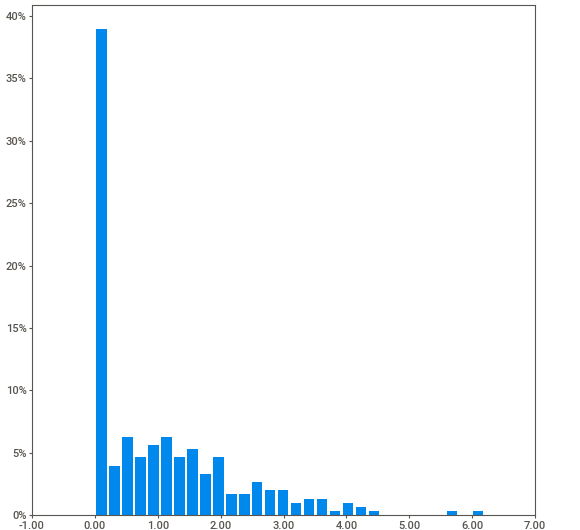
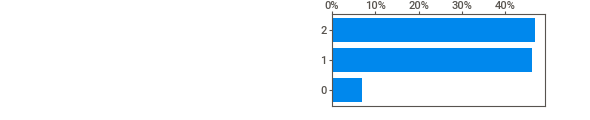
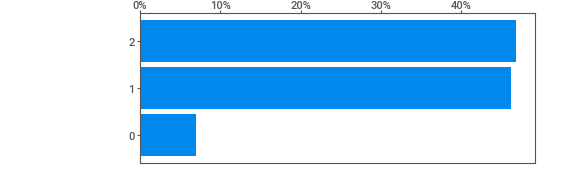
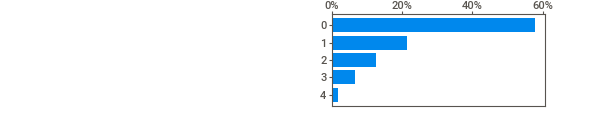
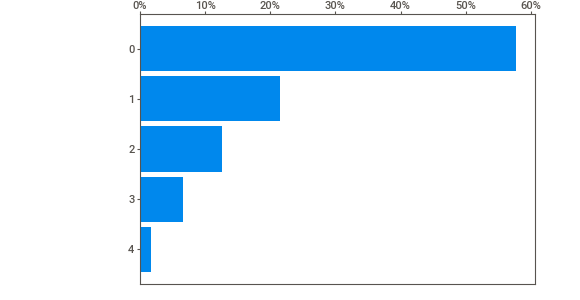
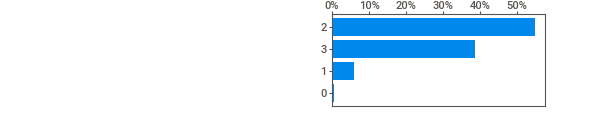
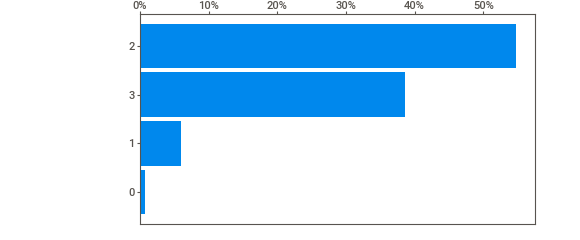
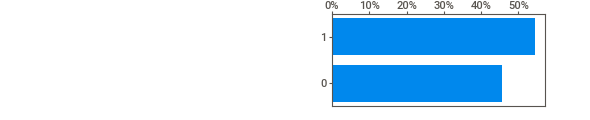
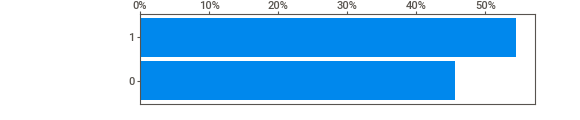
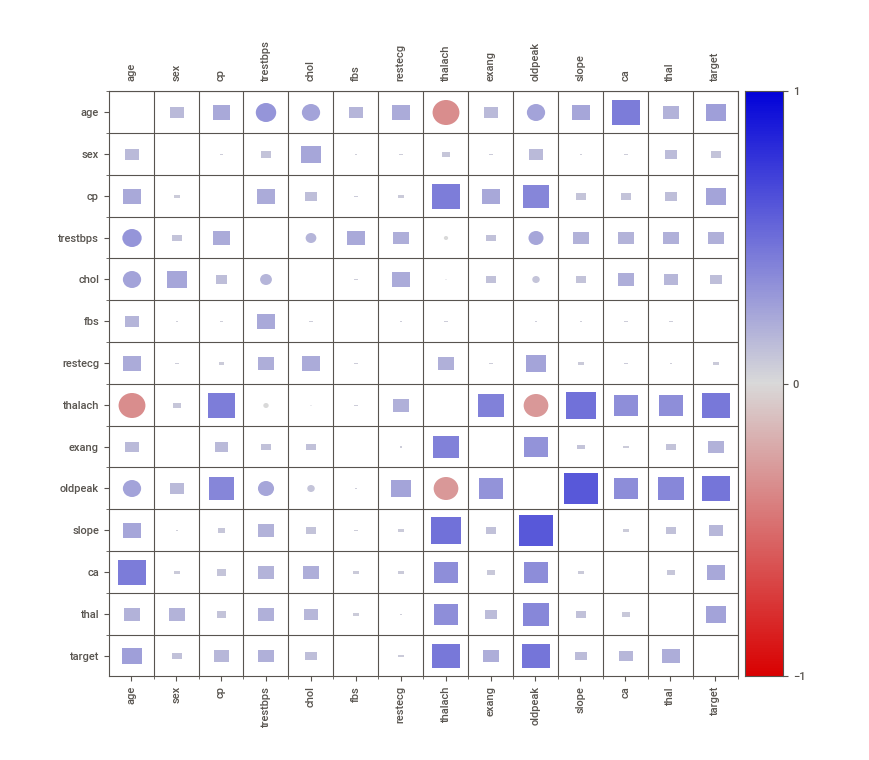
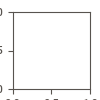

In [138]:
import sweetviz
sweetviz.analyze(data).show_notebook()

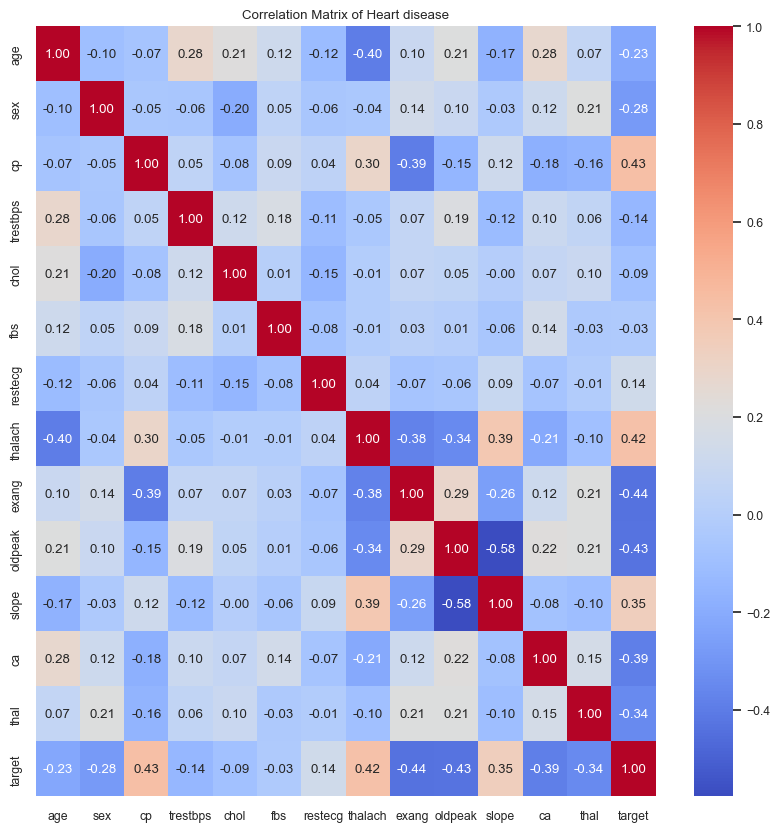

In [139]:
#상관 관계 행렬
data_corr=data.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(data_corr, annot=True, cmap='coolwarm', fmt='.2f')
#sns.heatmap(data_corr, annot=True, cbar=False)
plt.title('Correlation Matrix of Heart disease')
plt.show()

In [140]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [223]:
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [209]:
X = data.drop(['trestbps'], axis=1)[['oldpeak', 'age', 'ca']]
X

,oldpeak,age
0,2.3,63
1,3.5,37
2,1.4,41
3,0.8,56
4,0.6,57
...,...,...
298,0.2,57
299,1.2,45
300,3.4,68
301,1.2,57


In [210]:
y = data['trestbps']
y

0      145
1      130
2      130
3      120
4      120
      ... 
298    140
299    110
300    144
301    130
302    130
Name: trestbps, Length: 303, dtype: int64

In [211]:
df1 = pd.DataFrame(data, columns=['oldpeak', 'age','trestbps'])

In [212]:
df1.head()

,oldpeak,age,trestbps
0,2.3,63,145
1,3.5,37,130
2,1.4,41,130
3,0.8,56,120
4,0.6,57,120


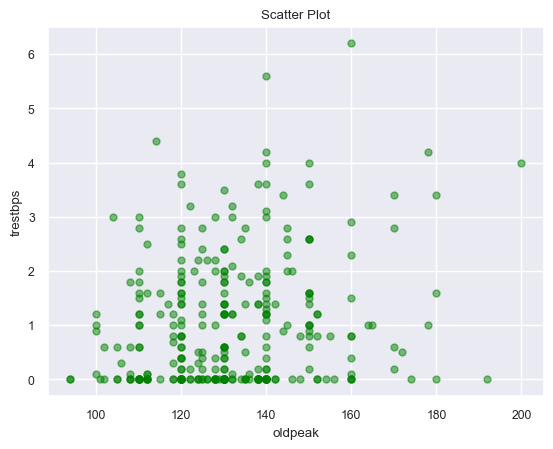

In [213]:
plt.plot('trestbps', 'oldpeak', 
         data=df1,
         linestyle='none', 
         marker='o', 
         markersize=5,
         color='Green', 
         alpha=0.5)
plt.title('Scatter Plot')
plt.xlabel('oldpeak')
plt.ylabel('trestbps')
plt.show()

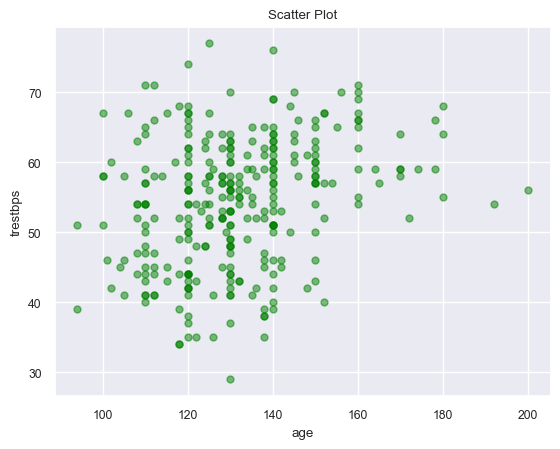

In [214]:
plt.plot('trestbps', 'age', 
         data=df1,
         linestyle='none', 
         marker='o', 
         markersize=5,
         color='Green', 
         alpha=0.5)
plt.title('Scatter Plot')
plt.xlabel('age')
plt.ylabel('trestbps')
plt.show()

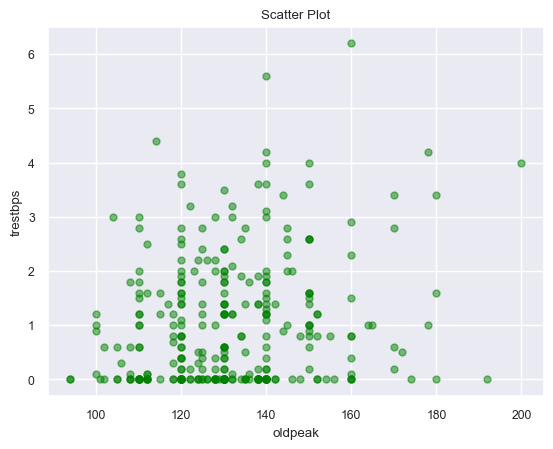

In [215]:
plt.plot('trestbps', 'oldpeak', 
         data=df1,
         linestyle='none', 
         marker='o', 
         markersize=5,
         color='Green', 
         alpha=0.5)
plt.title('Scatter Plot')
plt.xlabel('oldpeak')
plt.ylabel('trestbps')
plt.show()

In [216]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(X, y,test_size=0.25,random_state=0)


In [217]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeRegressor

clf_dt = DecisionTreeRegressor()
clf_dt.fit(train_input, train_target)

pred_dt = clf_dt.predict(test_input)

print(clf_dt.score(train_input, train_target))

0.8257174424633674


In [218]:
mse = np.sqrt(mean_squared_error(pred_dt, test_target))
print('평균제곱근오차', mse)

평균제곱근오차 24.519082853496133


In [219]:
X_train = train_input
X_test = test_input
y_train = train_target
y_test = test_target

In [220]:

from sklearn.ensemble import RandomForestRegressor

rf_clf = RandomForestRegressor()
rf_clf.fit(X_train, y_train)

pred_rf = rf_clf.predict(X_test)

print(rf_clf.score(X_train, y_train))

0.7030014226356227


In [221]:
mse = np.sqrt(mean_squared_error(pred_rf, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 19.716364480075008


In [222]:
from sklearn.linear_model import LinearRegression

clf_lr = LinearRegression()
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print(clf_lr.score(X_train, y_train))

0.08211039369022155


In [186]:

mse = np.sqrt(mean_squared_error(pred_lr, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 16.828616562506028


In [187]:
from sklearn.svm import SVR

clf_svm = SVR()
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print(clf_svm.score(X_train, y_train))

0.018163712504202123


In [188]:
mse = np.sqrt(mean_squared_error(pred_svm, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 18.051098363013132


In [144]:
from sklearn.preprocessing import PolynomialFeatures

# 기본적으로는 degree=2가 적용됩니다.
poly = PolynomialFeatures(degree=3)  # 3차 다항식으로 설정
poly.fit([[2, 3]])
result = poly.transform([[2, 3]])
print(result)


[[ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]


In [145]:
poly = PolynomialFeatures(include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)

In [146]:
print(train_poly.shape)

(227, 14)


In [147]:
poly.get_feature_names_out()

array(['target', 'oldpeak', 'fbs', 'age', 'target^2', 'target oldpeak',
       'target fbs', 'target age', 'oldpeak^2', 'oldpeak fbs',
       'oldpeak age', 'fbs^2', 'fbs age', 'age^2'], dtype=object)

In [148]:
test_poly = poly.transform(test_input)

In [149]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.13098357556617268


In [150]:
print(lr.score(test_poly, test_target))

0.18938740464937154


In [151]:
poly = PolynomialFeatures(degree=5, include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [152]:
print(train_poly.shape)

(227, 125)


In [153]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.3189659566409955


In [154]:
print(lr.score(test_poly, test_target))
#과대적합 발생

-6.892186171715355


In [155]:
#규제

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [156]:
#릿지회귀
#alpha값이 크면 규제 강도가 강함-> 과소적합, 작으면 규제가 적음 -> 과대적합

from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.1954482084436665


In [157]:
print(ridge.score(test_scaled, test_target))

0.24944009248591514


In [158]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

In [159]:
#적절한 alpha값을 찾기 위해 0.001에서 100까지 늘리면서 훈련한다.

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 릿지 모델을 만듭니다
    ridge = Ridge(alpha=alpha)
    # 릿지 모델을 훈련합니다
    ridge.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

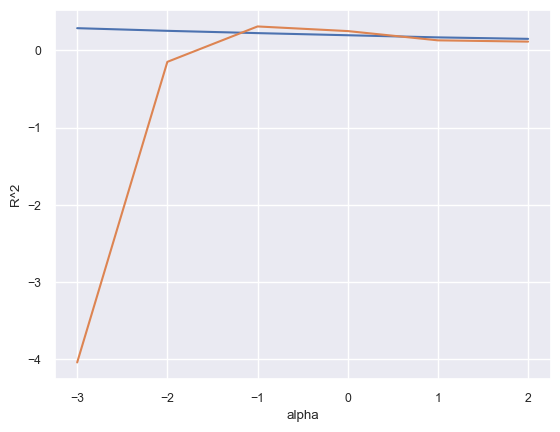

In [160]:
#점수차가 크면 과대적합, 모두 감소하면 과소적합
#두 그래프가 가장 가깝고 테스트점수(주황)이 가장 높은거 선택하기

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [172]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.22302582914148283
0.30929523504308964


In [173]:
#라쏘회귀


from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.12048075056456109


In [174]:

print(lasso.score(test_scaled, test_target))

0.16281593591628674


In [175]:
#경고 뜻 : 라쏘 모델은 최적의 개수를 찾기 위해 반복적인 계산을 수행하는데, 지정한 반복의 횟수가 부족할 때 경고발생, 이 문제에서는 영향이 크게 없다.

train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 라쏘 모델을 만듭니다
    lasso = Lasso(alpha=alpha, max_iter=10000)
    # 라쏘 모델을 훈련합니다
    lasso.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

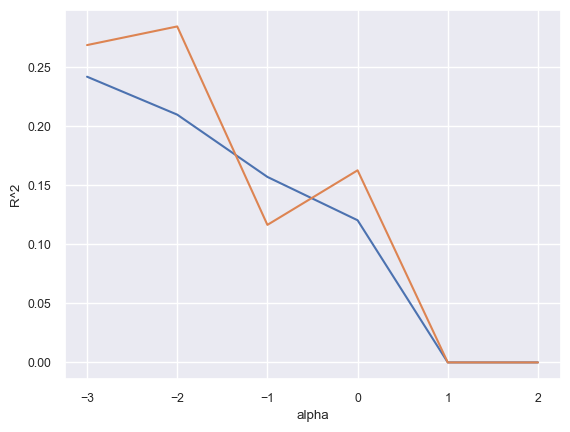

In [176]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()